In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
sns.set_style('whitegrid')
# read data
market_df = pd.read_csv('data/global_sales_data/market_fact.csv')
customer_df = pd.read_csv('data/global_sales_data/cust_dimen.csv')
product_df = pd.read_csv('data/global_sales_data/prod_dimen.csv')
shipping_df = pd.read_csv('data/global_sales_data/shipping_dimen.csv')
orders_df = pd.read_csv('data/global_sales_data/orders_dimen.csv')

In [4]:
df = pd.merge(market_df,orders_df,how='inner',on='Ord_id')
df.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Order_ID,Order_Date,Order_Priority
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,36262,27-07-2010,NOT SPECIFIED
1,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59,36262,27-07-2010,NOT SPECIFIED
2,Ord_5446,Prod_6,SHP_7608,Cust_1818,164.02,0.03,23,-47.64,6.15,0.37,36262,27-07-2010,NOT SPECIFIED
3,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54,20513,07-07-2009,HIGH
4,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37,39682,09-11-2010,MEDIUM


In [6]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8399 entries, 0 to 8398
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Ord_id               8399 non-null   object        
 1   Prod_id              8399 non-null   object        
 2   Ship_id              8399 non-null   object        
 3   Cust_id              8399 non-null   object        
 4   Sales                8399 non-null   float64       
 5   Discount             8399 non-null   float64       
 6   Order_Quantity       8399 non-null   int64         
 7   Profit               8399 non-null   float64       
 8   Shipping_Cost        8399 non-null   float64       
 9   Product_Base_Margin  8336 non-null   float64       
 10  Order_ID             8399 non-null   int64         
 11  Order_Date           8399 non-null   datetime64[ns]
 12  Order_Priority       8399 non-null   object        
dtypes: datetime64[ns](1), float64(5),

In [7]:
# aggregating total sales on each day
time_df = df.groupby('Order_Date')['Sales'].sum()
print(time_df.head())
print(type(time_df))

Order_Date
2009-01-01    1052.8400
2009-01-02    5031.9000
2009-01-03    7288.1375
2009-01-04    6188.4245
2009-01-05    2583.3300
Name: Sales, dtype: float64
<class 'pandas.core.series.Series'>


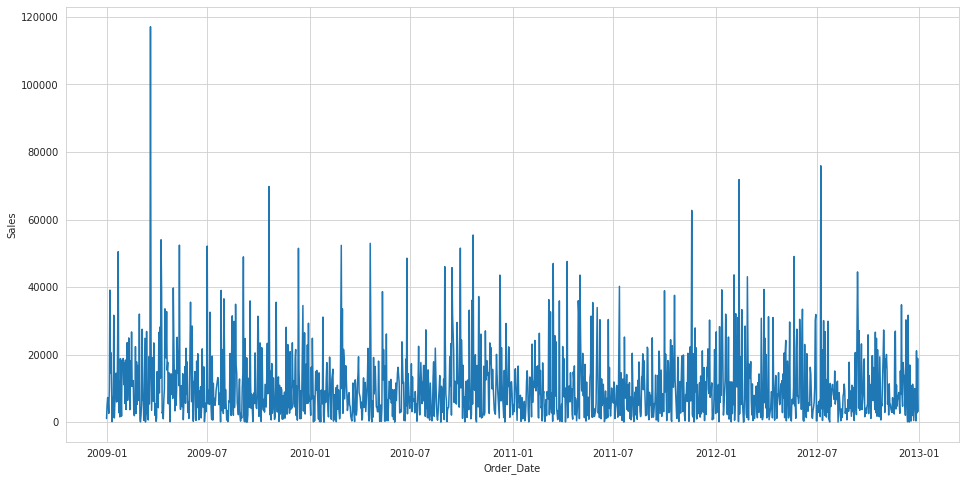

In [9]:
plt.figure(figsize=(16,8))

sns.lineplot(data=time_df)
plt.show()

In [10]:
df['month'] = df['Order_Date'].dt.month
df['year'] = df['Order_Date'].dt.year

In [12]:
df_time = df.groupby(['year','month'])['Sales'].mean()
df_time.head()

year  month
2009  1        1898.475090
      2        2116.510723
      3        2258.661599
      4        2374.155868
      5        1922.317055
Name: Sales, dtype: float64